<a href="https://colab.research.google.com/github/rex9840/FinalYearProject/blob/backend/mode/Recomendation_using_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [185]:
import os

if os.path.isfile("rating.csv") and os.path.isfile("user_rating.csv"):
  pass
else : uplaod = files.upload()

In [186]:
course_rating = pd.read_csv("rating.csv")
course_rating.head()

,course_id,course_name,tags,lectures_min,rating,subscribed_members
0,CS601,Introduction to Computer Science,"Programming,Computer Science,Algorithms",30,4.2,5000
1,CND401,Computer Networking Fundamentals,"Networking,Computer Networks,Internet",25,4.0,3800
2,WD501,Web Development Basics,"Web Development,HTML,CSS,JavaScript,Frontend,B...",20,4.5,6000
3,DL701,Deep Learning Fundamentals,"Machine Learning,Deep Learning,Neural Networks...",40,4.3,8000
4,CSF701,Computer Security Fundamentals,"Cybersecurity,Security,Encryption,Data Protection",35,4.1,4500


In [187]:
user_rating = pd.read_csv("user_rating.csv")
user_rating.head()

,user_id,course_id,rating
0,1,QC108,4.1
1,1,QC103,4.0
2,2,QC103,4.6
3,2,WD502,3.8
4,2,RA704,4.2


In [188]:
course = course_rating.drop(columns = ["course_name","rating","subscribed_members","lectures_min"])
course.head()

,course_id,tags
0,CS601,"Programming,Computer Science,Algorithms"
1,CND401,"Networking,Computer Networks,Internet"
2,WD501,"Web Development,HTML,CSS,JavaScript,Frontend,B..."
3,DL701,"Machine Learning,Deep Learning,Neural Networks..."
4,CSF701,"Cybersecurity,Security,Encryption,Data Protection"


In [189]:
slice_course = course.copy()
for i,rows in slice_course.iterrows():
  for tag in rows["tags"].strip().split(","):
    slice_course[tag] = np.nan
    slice_course.at[i,tag]=1


slice_course = slice_course.drop(columns = "tags")
slice_course.head()

<ipython-input-189-508b0a764c4f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  slice_course[tag] = np.nan
<ipython-input-189-508b0a764c4f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  slice_course[tag] = np.nan
<ipython-input-189-508b0a764c4f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  s

,course_id,Programming,Computer Science,Algorithms,Networking,Computer Networks,Internet,Web Development,HTML,CSS,...,Multi-Robot Systems,Quantum Circuit Simulations,Quantum Algorithm Simulators,Mobile UI/UX Principles,Responsive Design,OWASP Top 10,Vulnerability Assessment,data analysis,data preprocessing,data preperation
0,CS601,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CND401,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WD501,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DL701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CSF701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
user_course_rating = user_rating.join(slice_course.set_index("course_id"), "course_id")

user_course_rating.head()


,user_id,course_id,rating,Programming,Computer Science,Algorithms,Networking,Computer Networks,Internet,Web Development,...,Multi-Robot Systems,Quantum Circuit Simulations,Quantum Algorithm Simulators,Mobile UI/UX Principles,Responsive Design,OWASP Top 10,Vulnerability Assessment,data analysis,data preprocessing,data preperation
0,1,QC108,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,QC103,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,QC103,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,WD502,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,RA704,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
user_course_rating = user_course_rating.drop(columns = ["course_id"])
column_attr = user_course_rating.columns.tolist()
column_attr.remove("rating")
column_attr.remove("user_id")

user_course_rating[column_attr] = user_course_rating[column_attr].mul(user_course_rating["rating"], axis=0 )

user_course_rating.head()

,user_id,rating,Programming,Computer Science,Algorithms,Networking,Computer Networks,Internet,Web Development,HTML,...,Multi-Robot Systems,Quantum Circuit Simulations,Quantum Algorithm Simulators,Mobile UI/UX Principles,Responsive Design,OWASP Top 10,Vulnerability Assessment,data analysis,data preprocessing,data preperation
0,1,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
users = user_course_rating.groupby(by="user_id").mean()
users = users.fillna(value=0)
users.head()

,rating,Programming,Computer Science,Algorithms,Networking,Computer Networks,Internet,Web Development,HTML,CSS,...,Multi-Robot Systems,Quantum Circuit Simulations,Quantum Algorithm Simulators,Mobile UI/UX Principles,Responsive Design,OWASP Top 10,Vulnerability Assessment,data analysis,data preprocessing,data preperation
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.225000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


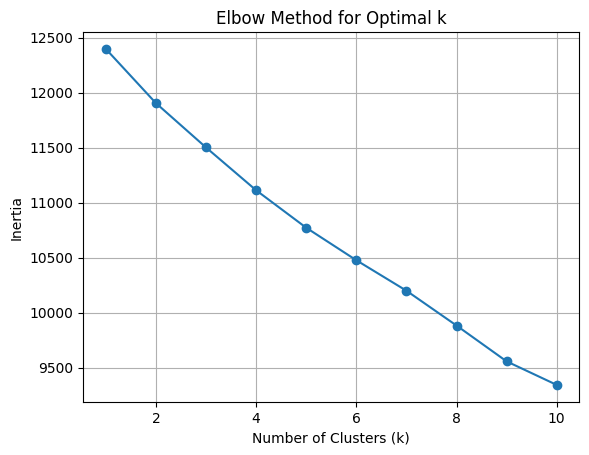

In [219]:
###########################################################


# K-MEAN CLUSTURING

# Elbow Method  for determination of clusters

# poting against sumofsquare(inertia) vs number of clusters

inertia = []

for k in range(1,11):
  k_means  = KMeans(n_clusters=k,n_init=130)
  k_means.fit(users)
  inertia.append(k_means.inertia_)

plt.plot(range(1,11), inertia, marker= 'o' )
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [194]:
'''
From the graph we can observe that the the inertia when ploted against the number of cluster slows down between  6 to 10  so taking optimal value of 8 for n_cluster
i.e. number of cluster to be taken is 6
'''




'\nFrom the graph we can observe that the the inertia when ploted against the number of cluster slows down between  6 to 10  so taking optimal value of 8 for n_cluster\ni.e. number of cluster to be taken is 6\n'

In [221]:
# Kmean
kmeans= KMeans(n_clusters=8, n_init=130)
users_with_label = pd.DataFrame(users)
users_with_label["label"]= kmeans.fit_predict(users)
users_with_label.head()


,rating,Programming,Computer Science,Algorithms,Networking,Computer Networks,Internet,Web Development,HTML,CSS,...,Quantum Circuit Simulations,Quantum Algorithm Simulators,Mobile UI/UX Principles,Responsive Design,OWASP Top 10,Vulnerability Assessment,data analysis,data preprocessing,data preperation,label
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,4.225000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,4.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,4.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,3.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


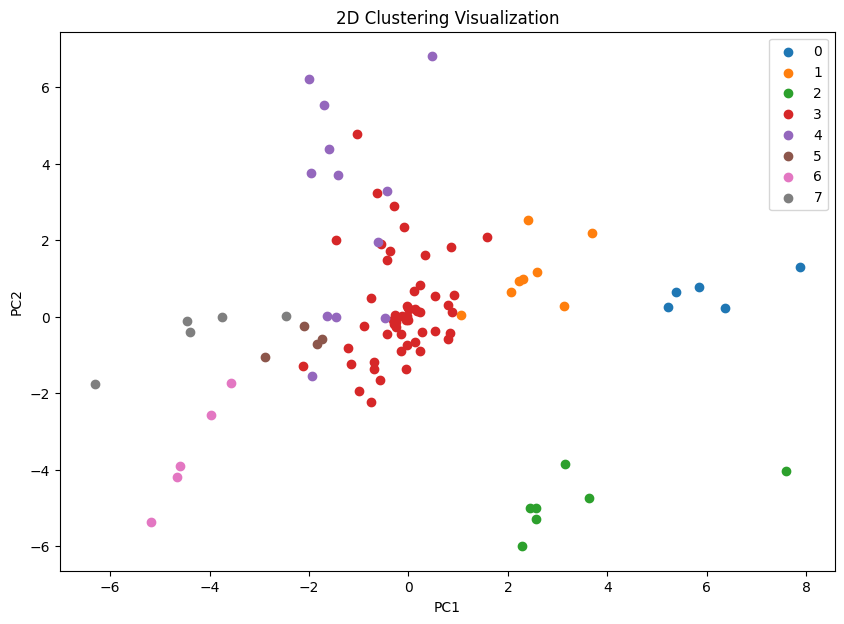

In [220]:
# prompt: generate a 2d clustering visualization

pca = PCA(n_components=2)
pca_data = pca.fit_transform(users)

# Generate 2D clustering visualization
fig, ax = plt.subplots(figsize=(10, 7))
for label in range(kmeans.n_clusters):
    ax.scatter(
        pca_data[users_with_label["label"] == label, 0],
        pca_data[users_with_label["label"] == label, 1],
        label=label,
    )
ax.set_title("2D Clustering Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.show()


In [197]:
# Recomendations

rating_user = user_rating.join(users_with_label['label'], on ="user_id")
rating_user.head()




,user_id,course_id,rating,label
0,1,QC108,4.1,3
1,1,QC103,4.0,3
2,2,QC103,4.6,2
3,2,WD502,3.8,2
4,2,RA704,4.2,2


In [198]:
print(rating_user)

     user_id course_id  rating  label
0          1     QC108     4.1      3
1          1     QC103     4.0      3
2          2     QC103     4.6      2
3          2     WD502     3.8      2
4          2     RA704     4.2      2
..       ...       ...     ...    ...
292       99     WD507     3.5      7
293       99    CSF707     4.6      7
294       99    MAD502     3.9      7
295      100    MAD504     4.4      3
296      100    NLP910     4.2      3

[297 rows x 4 columns]


In [199]:
print(rating_user.columns.tolist())

group = rating_user[['course_id','rating','label']].groupby(by=["label","course_id"])["rating"].agg(["mean","count"])

group.head()

['user_id', 'course_id', 'rating', 'label']


mean  count
label course_id             
0     CSF707      4.5      1
      CSF708      4.0      1
      CSF710      4.2      1
      DBMS708     4.2      5
      DL709       3.6      1

In [200]:
# goodness evaluation (obj -> objective) is the mean rating multiplied by the count


group["obj"] = group["mean"]*group["count"]

group.head()

mean  count   obj
label course_id                   
0     CSF707      4.5      1   4.5
      CSF708      4.0      1   4.0
      CSF710      4.2      1   4.2
      DBMS708     4.2      5  21.0
      DL709       3.6      1   3.6

In [201]:
group_obj = group[["obj"]].dropna()

group_obj.head()

obj
label course_id      
0     CSF707      4.5
      CSF708      4.0
      CSF710      4.2
      DBMS708    21.0
      DL709       3.6

In [202]:
# Assuming user_id is the input mechanism
user_id = 3
# Filter user data
user_data = rating_user[rating_user["user_id"] == user_id]
print(user_data)
user_cluster_label = user_data["label"].iloc[0]
print(user_data["label"].iloc[0])


# Get recommendations for the user's cluster
user_group_obj = group_obj.loc[user_cluster_label]
sorted_recommendations = user_group_obj.sort_values(by="obj", ascending=False).reset_index()

# Join with course details
recommendations = sorted_recommendations.join(course_rating[['course_name', 'course_id']].set_index('course_id'), on="course_id")
print(recommendations.head(50))

# Display recommendations
print(f"Top recommendations for user {user_id}:")
for i, row in recommendations.iterrows():
    print(f"- {row['course_name']}")


   user_id course_id  rating  label
6        3     DL705     3.9      7
7        3     WD507     4.3      7
7
   course_id   obj                                       course_name
0      WD507  16.5                               Frontend Frameworks
1      DL705   8.3                   Generative Adversarial Networks
2     CSF707   4.6                               Threat Intelligence
3      QC101   4.4                          Quantum Computing Basics
4     CSF702   4.3                        Advanced Computer Security
5     EHT409   4.3  Penetration Testing and Vulnerability Assessment
6      QC109   4.0                         Post-Quantum Cryptography
7      DL710   3.9     Deep Learning for Natural Language Processing
8     MAD502   3.9                   Advanced Mobile App Development
9    DBMS705   3.8                          Blockchain and Databases
10    NLP905   3.8                             Information Retrieval
11     QC104   3.6                                Quantum Algo

In [203]:
course_rating.head(1)

,course_id,course_name,tags,lectures_min,rating,subscribed_members
0,CS601,Introduction to Computer Science,"Programming,Computer Science,Algorithms",30,4.2,5000


In [204]:
group_obj.loc[4]

,obj
course_id,
CND407,8.2
CND408,30.2
CSF701,3.6
CSF703,3.6
CSF705,4.2
CSF706,4.4
DBMS701,4.2
DBMS703,4.4
DBMS707,3.6


In [205]:
# sorting information



lebels  = group_obj.index.get_level_values(0).unique().tolist()
print(lebels)


recomendation = []

for x in lebels:

  sort = group_obj.loc[x].sort_values(by="obj", ascending=False).reset_index()
  join_ = sort.join(
      course_rating[['course_name', 'course_id']].set_index('course_id') , on="course_id"
  )

  recomendation.append(join_['course_name'].rename(x))

recomendation_= pd.concat(recomendation ,axis =1)



print(join_.head())


[0, 1, 2, 3, 4, 5, 6, 7]
  course_id   obj                      course_name
0     WD507  16.5              Frontend Frameworks
1     DL705   8.3  Generative Adversarial Networks
2    CSF707   4.6              Threat Intelligence
3     QC101   4.4         Quantum Computing Basics
4    CSF702   4.3       Advanced Computer Security


In [206]:
recomendation_.head(10)

,0,1,2,3,4,5,6,7
0,Data Warehousing Solutions,Mobile Application Security,Virtual Reality App Development,Quantum Algorithms,Internet of Things,Web Development Basics,Software Testing and Quality Assurance,Frontend Frameworks
1,Post-Quantum Cryptography,Network Security,Introduction to Computer Science,Penetration Testing and Vulnerability Assessment,Deep Learning for Natural Language Processing,Human-Centered Robotics,Ethical Hacking Techniques,Generative Adversarial Networks
2,Security Information and Event Management,Software-Defined Networking,Responsive Web Design,Data Privacy and Compliance,Software-Defined Networking,Software Engineering,Introduction to Computer Science,Threat Intelligence
3,Mobile Security,Dialogue Systems,Quantum Cryptography Protocols,Cloud Computing,Mobile User Interface Design,Static Site Generators,Quantum Cryptography,Quantum Computing Basics
4,Sentiment Analysis,Backend Frameworks,Quantum Cryptography,Security Architecture and Design,Language Generation Models,Information Security,Quantum Machine Learning,Advanced Computer Security
5,Threat Intelligence,Blockchain and Databases,Advanced Computer Networking,Progressive Web Apps,Quantum Computing Applications,Web Application Security,Cloud Networking,Penetration Testing and Vulnerability Assessment
6,Cybersecurity Governance,Text Analytics,Data Warehousing Solutions,Advanced Computer Science,Sentiment Analysis,Transfer Learning,Data Warehousing and Business Intelligence,Post-Quantum Cryptography
7,Responsive Web Design,Swarm Robotics,Autonomous Vehicles,Computer Networking Fundamentals,Advanced Deep Learning,Network Security Management,Quantum Cryptography Protocols,Deep Learning for Natural Language Processing
8,Incident Response and Management,Advanced Web Development,Advanced Database Management Systems,Modern Web Frameworks,Network Security Management,Dialogue Systems,Language Generation Models,Advanced Mobile App Development
9,Advanced Mobile App Development,Security Information and Event Management,Augmented Reality App Development,Machine Learning,Security Operations Center,Robotics and Automation,Blockchain and Databases,Blockchain and Databases


In [207]:
recomendation_.head(2)



,0,1,2,3,4,5,6,7
0,Data Warehousing Solutions,Mobile Application Security,Virtual Reality App Development,Quantum Algorithms,Internet of Things,Web Development Basics,Software Testing and Quality Assurance,Frontend Frameworks
1,Post-Quantum Cryptography,Network Security,Introduction to Computer Science,Penetration Testing and Vulnerability Assessment,Deep Learning for Natural Language Processing,Human-Centered Robotics,Ethical Hacking Techniques,Generative Adversarial Networks


In [208]:
print(recomendation_.head(2).to_numpy())

[['Data Warehousing Solutions' 'Mobile Application Security'
  'Virtual Reality App Development' 'Quantum Algorithms'
  'Internet of Things' 'Web Development Basics'
  'Software Testing and Quality Assurance' 'Frontend Frameworks']
 ['Post-Quantum Cryptography' 'Network Security'
  'Introduction to Computer Science'
  'Penetration Testing and Vulnerability Assessment'
  'Deep Learning for Natural Language Processing'
  'Human-Centered Robotics' 'Ethical Hacking Techniques'
  'Generative Adversarial Networks']]


In [209]:
print(np.unique(recomendation_.head(2).to_numpy()))

['Data Warehousing Solutions'
 'Deep Learning for Natural Language Processing'
 'Ethical Hacking Techniques' 'Frontend Frameworks'
 'Generative Adversarial Networks' 'Human-Centered Robotics'
 'Internet of Things' 'Introduction to Computer Science'
 'Mobile Application Security' 'Network Security'
 'Penetration Testing and Vulnerability Assessment'
 'Post-Quantum Cryptography' 'Quantum Algorithms'
 'Software Testing and Quality Assurance'
 'Virtual Reality App Development' 'Web Development Basics']


In [210]:
for i in range(4):
  print(np.unique(recomendation_.head(i).to_numpy()))

[]
['Data Warehousing Solutions' 'Frontend Frameworks' 'Internet of Things'
 'Mobile Application Security' 'Quantum Algorithms'
 'Software Testing and Quality Assurance'
 'Virtual Reality App Development' 'Web Development Basics']
['Data Warehousing Solutions'
 'Deep Learning for Natural Language Processing'
 'Ethical Hacking Techniques' 'Frontend Frameworks'
 'Generative Adversarial Networks' 'Human-Centered Robotics'
 'Internet of Things' 'Introduction to Computer Science'
 'Mobile Application Security' 'Network Security'
 'Penetration Testing and Vulnerability Assessment'
 'Post-Quantum Cryptography' 'Quantum Algorithms'
 'Software Testing and Quality Assurance'
 'Virtual Reality App Development' 'Web Development Basics']
['Data Privacy and Compliance' 'Data Warehousing Solutions'
 'Deep Learning for Natural Language Processing'
 'Ethical Hacking Techniques' 'Frontend Frameworks'
 'Generative Adversarial Networks' 'Human-Centered Robotics'
 'Internet of Things' 'Introduction to Comp

In [211]:
for i in range(11):
    print(f'{i} recomendations: {np.unique(recomendation_.head(i).to_numpy()).__len__()} lecture in total')

0 recomendations: 0 lecture in total
1 recomendations: 8 lecture in total
2 recomendations: 16 lecture in total
3 recomendations: 22 lecture in total
4 recomendations: 30 lecture in total
5 recomendations: 37 lecture in total
6 recomendations: 43 lecture in total
7 recomendations: 48 lecture in total
8 recomendations: 53 lecture in total
9 recomendations: 58 lecture in total
10 recomendations: 62 lecture in total


In [212]:
recomendation_.loc(1)[4]

0                                Internet of Things
1     Deep Learning for Natural Language Processing
2                       Software-Defined Networking
3                      Mobile User Interface Design
4                        Language Generation Models
                          ...                      
76                                              NaN
77                                              NaN
78                                              NaN
79                                              NaN
80                                              NaN
Name: 4, Length: 81, dtype: object

In [213]:
user_id = 1

user_data = rating_user[rating_user["user_id"] == user_id]
user_cluster_label = user_data["label"].iloc[0]
